#### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup as bs

pd.options.mode.chained_assignment = None  # default='warn'

### Data Wrangling

In [2]:
#get html page
marvel_url = "https://www.imdb.com/list/ls000024621/?sort=release_date,desc&st_dt=&mode=detail&page=1"
dc_url = "https://www.imdb.com/list/ls000024643/?sort=release_date,desc&st_dt=&mode=detail&page=1"

#marvel html
response_marvel = requests.get(marvel_url)
content_marvel = response_marvel.content
html_marvel = bs(content_marvel,"html.parser")

#marvel html
response_dc = requests.get(dc_url)
content_dc = response_dc.content
html_dc = bs(content_dc,"html.parser")

####  Marvel Cinematic Universe Web Scraping from imdb.com

In [3]:
#collection variables
marvel_movies_titles_lists = []
marvel_movies_titles = []
marvel_movies_imdb_ratings = []
marvel_movies_metascore_ratings = []
marvel_movies_genre = []
marvel_movies_p_lists = []
marvel_movies_domestic_revenue=[]
marvel_movies_summary =[]
marvel_movies_director = []
marvel_movies_stars =[]
marvel_movies_running_time = []
marvel_movies_age_restriction = []
marvel_movies_release_year = []

#get marvel data
marvel_movies_html_lists = html_marvel.find_all("div", class_="lister-item-content")
for marvel_movie in marvel_movies_html_lists:
    #store movie title
    try:
        marvel_movies_titles.append(marvel_movie.h3.a.text)
    except:
        marvel_movies_titles.append("")
        
    #store movie release date
    try:
        marvel_movies_release_year.append(marvel_movie.find("span",class_="lister-item-year text-muted unbold").text[-6:].strip())
    except:
        marvel_movies_release_year.append("")    
        
    #store movie imdb rating
    try:
        marvel_movies_imdb_ratings.append(marvel_movie.find('span',class_="ipl-rating-star__rating").text)
    except:
        marvel_movies_imdb_ratings.append("")
    
    #store movie Metascore rating (if exists)
    try:
        marvel_movies_metascore_ratings.append(marvel_movie.find('div',class_="inline-block ratings-metascore").text.replace("\n","").split(" ")[0].strip())
    except:
        marvel_movies_metascore_ratings.append("")
        
    #store movie summary (if exists)
    try:
        marvel_movies_summary.append(marvel_movie.find('p',class_="").text.replace('\n',""))
    except:
        marvel_movies_summary.append("")
    
    #get domestic_revenue, director, stars, running_time, genre,age_restriction
    marvel_movies_p_lists.append(marvel_movie.find_all("p",class_="text-muted text-small"))

#seperate domestic_revenue, director, stars, running_time, genre,age_restriction into individual collections
for i in range(0,len(marvel_movies_p_lists)):
    #store movie domestic revenue
    try:
        marvel_movies_domestic_revenue.append(marvel_movies_p_lists[i][2].text.split("|")[1].split(":")[1].strip())
    except:
        marvel_movies_domestic_revenue.append("")
    
    #store movie director
    try:
        marvel_movies_director.append(marvel_movies_p_lists[i][1].text.split("|")[0].split(":")[1].strip().replace("\n",""))
    except:
        marvel_movies_director.append("")
        
    #store movie stars
    try:
        marvel_movies_stars.append(marvel_movies_p_lists[i][1].text.split("|")[1].split(":")[1].strip().replace('\n',''))
    except:
        marvel_movies_stars.append("")
    
    #store movie genre
    try:
        marvel_movies_genre.append(marvel_movies_p_lists[i][0].text.split("|",2)[2].strip())
    except:
        marvel_movies_genre.append("")
        
    #store movie running time
    try:
        marvel_movies_running_time.append(marvel_movies_p_lists[i][0].text.split("|",2)[1].split(" ")[0].strip())
    except:
        marvel_movies_running_time.append("")
        
    #store movie age restriction
    try:
        marvel_movies_age_restriction.append(marvel_movies_p_lists[i][0].text.split("|",2)[0].strip())
    except:
        marvel_movies_age_restriction.append("")
               
print(len(marvel_movies_running_time),len(marvel_movies_titles),len(marvel_movies_genre),len(marvel_movies_age_restriction))
print(len(marvel_movies_imdb_ratings), len(marvel_movies_metascore_ratings),len(marvel_movies_director),len(marvel_movies_stars))
print(len(marvel_movies_domestic_revenue),len(marvel_movies_summary),len(marvel_movies_release_year))

83 83 83 83
83 83 83 83
83 83 83


In [4]:
#create marvel movies dataframe
dict_marvel = {"Title":marvel_movies_titles,"Release Year":marvel_movies_release_year,"Genre":marvel_movies_genre, "IMDB Rating":marvel_movies_imdb_ratings,
               "Metascore":marvel_movies_metascore_ratings, "Running Time (minutes)":marvel_movies_running_time, "Rated":marvel_movies_age_restriction,
              "Domestic Revenue":marvel_movies_domestic_revenue, "Director":marvel_movies_director, "Stars":marvel_movies_stars, "Summary":marvel_movies_summary, "Universe":"Marvel"}
df_marvel = pd.DataFrame(data=dict_marvel)

In [5]:
print(marvel_movies_stars)

['', '', '', '', '', '', '', '', 'Shameik Moore', 'Brie Larson', '', 'Benedict Cumberbatch, Elizabeth Olsen, Chiwetel Ejiofor, Benedict Wong', 'Taika Waititi, Natalie Portman, Christian Bale, Chris Hemsworth', 'Elizabeth Debicki, Karen Gillan, Chris Pratt, Zoe Saldana', 'Tom Holland, Zendaya, Benedict Cumberbatch, Marisa Tomei', 'Angelina Jolie, Gemma Chan, Richard Madden, Salma Hayek', 'Michelle Yeoh, Awkwafina, Simu Liu, Florian Munteanu', 'Tom Hardy, Michelle Williams, Naomie Harris, Woody Harrelson', 'Scarlett Johansson, Robert Downey Jr., Florence Pugh, Rachel Weisz', 'Michael Keaton, Jared Leto, Adria Arjona, Matt Smith', 'Maisie Williams, Anya Taylor-Joy, Charlie Heaton, Alice Braga', 'Tom Holland, Samuel L. Jackson, Jake Gyllenhaal, Marisa Tomei', 'James McAvoy, Michael Fassbender, Jennifer Lawrence, Nicholas Hoult', 'Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth', 'Brie Larson, Samuel L. Jackson, Ben Mendelsohn, Jude Law', 'Shameik Moore, Jake Johnson, Hailee S

In [6]:
df_marvel[df_marvel["Release Year"].isin(["2013"])]

,Title,Release Year,Genre,IMDB Rating,Metascore,Running Time (minutes),Rated,Domestic Revenue,Director,Stars,Summary,Universe


In [7]:
df_marvel.replace("", np.nan, inplace=True)
df_marvel = df_marvel.dropna(axis=0)

####  DC Extended Universe Webscraping from imdb.com

In [8]:
#collection variables
dc_movies_titles_lists = []
dc_movies_titles = []
dc_movies_imdb_ratings = []
dc_movies_metascore_ratings = []
dc_movies_genre = []
dc_movies_p_lists = []
dc_movies_domestic_revenue=[]
dc_movies_summary =[]
dc_movies_director = []
dc_movies_stars =[]
dc_movies_running_time = []
dc_movies_age_restriction = []
dc_movies_release_year = []

#get dc data
dc_movies_html_lists = html_dc.find_all("div", class_="lister-item-content")
for dc_movie in dc_movies_html_lists:
    #store movie title
    try:
        dc_movies_titles.append(dc_movie.h3.a.text)
    except:
        dc_movies_titles.append("")
    
    #store movie release date
    try:
        dc_movies_release_year.append(dc_movie.find("span",class_="lister-item-year text-muted unbold").text[-6:].strip())
    except:
        dc_movies_release_year.append("") 
    
    #store movie imdb rating
    try:
        dc_movies_imdb_ratings.append(dc_movie.find('span',class_="ipl-rating-star__rating").text)
    except:
        dc_movies_imdb_ratings.append("")
    
    #store movie Metascore rating
    try:
        dc_movies_metascore_ratings.append(dc_movie.find('div',class_="inline-block ratings-metascore").text.replace("\n","").split(" ")[0].strip())
    except:
        dc_movies_metascore_ratings.append("")
        
    #store movie summary
    try:
        dc_movies_summary.append(dc_movie.find('p',class_="").text.replace('\n',""))
    except:
        dc_movies_summary.append("")
    
    #get domestic revenue, director, stars, running_time, genre,age_restriction
    dc_movies_p_lists.append(dc_movie.find_all("p",class_="text-muted text-small"))

#seperate domestic revenue, director, stars, running_time, genre,age_restriction into individual collections
for i in range(0,len(dc_movies_p_lists)):
    #store movie domestic revenue
    try:
        dc_movies_domestic_revenue.append(dc_movies_p_lists[i][2].text.split("|")[1].split(":")[1].strip())
    except:
        dc_movies_domestic_revenue.append("")
    
    #store movie director
    try:
        dc_movies_director.append(dc_movies_p_lists[i][1].text.split("|")[0].split(":")[1].strip().replace("\n",""))
    except:
        dc_movies_director.append("")
        
    #store movie stars
    try:
        dc_movies_stars.append(dc_movies_p_lists[i][1].text.split("|")[1].split(":")[1].strip().replace('\n',''))
    except:
        dc_movies_stars.append("")
    
    #store movie genre
    try:
        dc_movies_genre.append(dc_movies_p_lists[i][0].text.split("|",2)[2].strip())
    except:
        dc_movies_genre.append("")
        
    #store movie running time
    try:
        dc_movies_running_time.append(dc_movies_p_lists[i][0].text.split("|",2)[1].split(" ")[0].strip())
    except:
        dc_movies_running_time.append("")
        
    #store movie age restriction
    try:
        dc_movies_age_restriction.append(dc_movies_p_lists[i][0].text.split("|",2)[0].strip())
    except:
        dc_movies_age_restriction.append("")
               
print(len(dc_movies_running_time),len(dc_movies_titles),len(dc_movies_genre),len(dc_movies_age_restriction))
print(len(dc_movies_imdb_ratings), len(dc_movies_metascore_ratings),len(dc_movies_director),len(dc_movies_stars))
print(len(dc_movies_domestic_revenue),len(dc_movies_summary),len(dc_movies_release_year))

63 63 63 63
63 63 63 63
63 63 63


In [9]:
#create dc movies dataframe
dict_dc = {"Title":dc_movies_titles,"Release Year":dc_movies_release_year,"Genre":dc_movies_genre, "IMDB Rating":dc_movies_imdb_ratings,
               "Metascore":dc_movies_metascore_ratings, "Running Time (minutes)":dc_movies_running_time, "Rated":dc_movies_age_restriction,
              "Domestic Revenue":dc_movies_domestic_revenue, "Director":dc_movies_director, "Stars":dc_movies_stars, "Summary":dc_movies_summary, "Universe":"DC"}
df_dc = pd.DataFrame(data=dict_dc)

In [10]:
df_dc.replace("", np.nan, inplace=True)
df_dc = df_dc.dropna(axis = 0)

In [11]:
df_dc.head()

,Title,Release Year,Genre,IMDB Rating,Metascore,Running Time (minutes),Rated,Domestic Revenue,Director,Stars,Summary,Universe
24,Birds of Prey: And the Fantabulous Emancipatio...,(2020),"Action, Adventure, Crime",6.1,60,109,14A,$84.16M,Cathy Yan,"Margot Robbie, Rosie Perez, Mary Elizabeth Win...","After splitting with the Joker, Harley Qui...",DC
25,Joker,(2019),"Crime, Drama, Thriller",8.5,59,122,14A,$335.45M,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","In Gotham City, mentally troubled comedian...",DC
26,Shazam!,(2019),"Action, Adventure, Comedy",7.1,71,132,PG,$140.37M,David F. Sandberg,"Zachary Levi, Mark Strong, Asher Angel, Jack D...",A newly fostered young boy in search of hi...,DC
27,Aquaman,(2018),"Action, Adventure, Fantasy",6.9,55,143,PG,$335.06M,James Wan,"Jason Momoa, Amber Heard, Willem Dafoe, Patric...","Arthur Curry, the human-born heir to the u...",DC
28,Teen Titans Go! To the Movies,(2018),"Animation, Action, Adventure",6.8,69,84,PG,$29.56M,"Aaron Horvath, Peter Rida Michail","Greg Cipes, Scott Menville, Khary Payton, Tara...",A villain's maniacal plan for world domina...,DC


In [12]:
#combine marvel and dc movie dataframes
df = pd.concat([df_marvel,df_dc])

In [13]:
#check for missing values
df.isnull().sum()

Title                     0
Release Year              0
Genre                     0
IMDB Rating               0
Metascore                 0
Running Time (minutes)    0
Rated                     0
Domestic Revenue          0
Director                  0
Stars                     0
Summary                   0
Universe                  0
dtype: int64

#### Formating DataFrame

In [14]:
#change type of IMDB Rating, Metascore, Running Time
df["IMDB Rating"] = df["IMDB Rating"].astype("float")
df["Metascore"] = df["Metascore"].astype("float")
df["Running Time (minutes)"] = df["Running Time (minutes)"].astype("int")

In [15]:
#convert release year to date format
df["Release Year"] = pd.to_datetime(df["Release Year"], format="(%Y)")
df["Release Year"] =df["Release Year"].dt.year

In [16]:
#convert Domestic Revenue to Money
df["Domestic Revenue"] = df["Domestic Revenue"].str.replace("$","")
df["Domestic Revenue"] = df["Domestic Revenue"].str.replace("M","")
df["Domestic Revenue"] = df["Domestic Revenue"].str.replace(",","")

#suppress pandas float scientific notation
pd.options.display.float_format = '{:,.2f}'.format

#convert to float
df["Domestic Revenue"] = df["Domestic Revenue"].astype("float")*1000000;
df.head()

,Title,Release Year,Genre,IMDB Rating,Metascore,Running Time (minutes),Rated,Domestic Revenue,Director,Stars,Summary,Universe
21,Spider-Man: Far from Home,2019,"Action, Adventure, Sci-Fi",7.50,69.00,129,PG,"390,530,000.00",Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Following the events of Avengers: Endgame ...,Marvel
22,Dark Phoenix,2019,"Action, Adventure, Sci-Fi",5.80,43.00,113,PG,"65,850,000.00",Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...",Jean Grey begins to develop incredible pow...,Marvel
23,Avengers: Endgame,2019,"Action, Adventure, Drama",8.40,78.00,181,PG,"858,370,000.00","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",After the devastating events of Avengers: ...,Marvel
24,Captain Marvel,2019,"Action, Adventure, Sci-Fi",6.90,64.00,123,PG,"426,830,000.00","Anna Boden, Ryan Fleck","Brie Larson, Samuel L. Jackson, Ben Mendelsohn...",Carol Danvers becomes one of the universe'...,Marvel
25,Spider-Man: Into the Spider-Verse,2018,"Animation, Action, Adventure",8.40,87.00,117,PG,"190,240,000.00","Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...",Teen Miles Morales becomes the Spider-Man ...,Marvel


#### Average Ratings and Revenue  by Universe

In [17]:
df.groupby(["Universe"])[["IMDB Rating", "Metascore","Running Time (minutes)","Domestic Revenue"]].agg(np.mean)

,IMDB Rating,Metascore,Running Time (minutes),Domestic Revenue
Universe,,,,
DC,6.34,55.55,126.10,"182,436,551.72"
Marvel,6.90,59.30,122.46,"249,416,315.79"


#### Number of movies released after 2000 by each Universe

In [18]:
pd.crosstab(df["Universe"],df["Release Year"]>2000,margins=True,margins_name="Total")

Release Year,False,True,Total
Universe,,,
DC,10,19,29
Marvel,3,54,57
Total,13,73,86


#### Highest Domestic Revenue Movie by Universe

In [19]:
df["Domestic Revenue"].groupby(df["Universe"]).agg(np.max)

Universe
DC       534,860,000.00
Marvel   858,370,000.00
Name: Domestic Revenue, dtype: float64

In [20]:
df[df["Domestic Revenue"]==max(df["Domestic Revenue"])][["Title","Release Year","IMDB Rating","Metascore","Domestic Revenue","Universe"]]

,Title,Release Year,IMDB Rating,Metascore,Domestic Revenue,Universe
23,Avengers: Endgame,2019,8.40,78.00,"858,370,000.00",Marvel


#### Most Appearances by Actor 

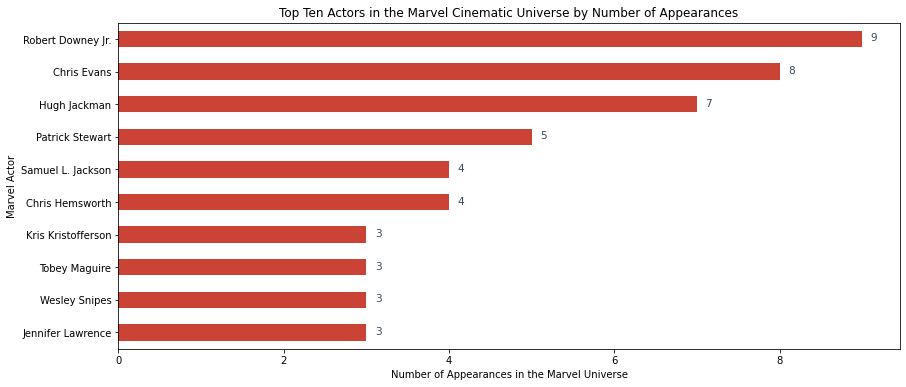

In [21]:
#Most appearance in Marvel movies in a star role
marvel_df_stars = pd.concat([df_marvel["Stars"].str.split(",",expand=True)[0],df_marvel["Stars"].str.split(",",expand=True)[1],df_marvel["Stars"].str.split(",",expand=True)[2]],axis=0)
marvel_df_stars = marvel_df_stars.str.strip()

#Plot
plt.rcParams["figure.figsize"]=(14,6)
ax = marvel_df_stars.value_counts(sort=True).nlargest(10).plot(kind='barh',color="#CB4335" )
plt.gca().invert_yaxis()
plt.ylabel("Marvel Actor")
plt.xlabel("Number of Appearances in the Marvel Universe")
plt.title("Top Ten Actors in the Marvel Cinematic Universe by Number of Appearances")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 10)), fontsize=10.5, color="#34495E")

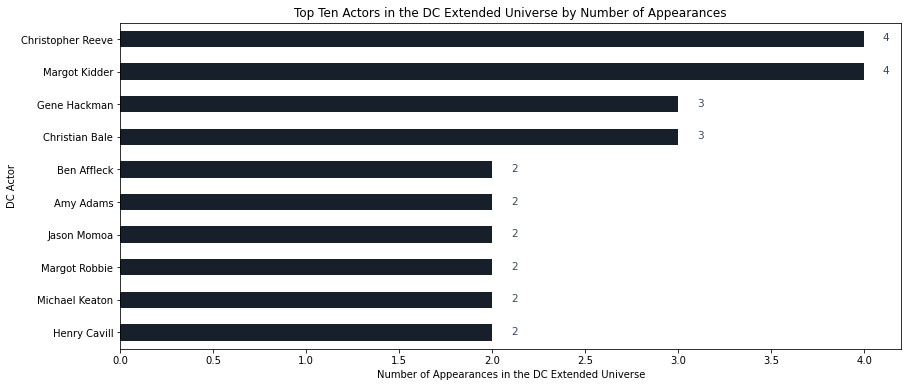

In [22]:
#Most appearance in Marvel movies in a star role
dc_df_stars = pd.concat([df_dc["Stars"].str.split(",",expand=True)[0],df_dc["Stars"].str.split(",",expand=True)[1],df_dc["Stars"].str.split(",",expand=True)[2]],axis=0)
dc_df_stars = dc_df_stars.str.strip()

#Plot
plt.rcParams["figure.figsize"]=(14,6)
ax = dc_df_stars.value_counts(sort=True).nlargest(10).plot(kind='barh',color="#17202A" )
plt.gca().invert_yaxis()
plt.ylabel("DC Actor")
plt.xlabel("Number of Appearances in the DC Extended Universe")
plt.title("Top Ten Actors in the DC Extended Universe by Number of Appearances")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 10)), fontsize=10.5, color="#34495E")

#### Most Domestic Revenue by Universe